In [113]:
# IMPORT DEPENDENCIES
# FOR DATA
import pandas as pd
import os
import csv
import math
import numpy as np
import time
import datetime
# import requests
# import datefinder

# # FOR SQL LITE
# from sqlalchemy import create_engine
# from datetime import date

# # FOR PLOTTING
# import matplotlib.pyplot as plt
# from matplotlib import style
# style.use("fivethirtyeight")
# from matplotlib import rcParams
# rcParams['figure.figsize'] = 10, 8

# FOR MODELING
from scipy.optimize import curve_fit
# from splinter import Browser
# from bs4 import BeautifulSoup as BS
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

# IMPORT DATA

In [114]:
# File path for the CSV Files
idahoFireWeatherDrought = os.path.join("..", "Data", "fires_Idaho_2000_2015_drought_weather.csv")

# Open the CSV Files, Convert to a Dataframe, and Save as a Variable
idaho_Fire_Weather_Drought_df = pd.read_csv(idahoFireWeatherDrought)
# fires_Idaho_df = pd.read_csv(idahoFires, dtype={"LOCAL_INCIDENT_ID": 'string', "FIRE_NAME": 'string'})

In [115]:
# Convert date to datetime format
idaho_Fire_Weather_Drought_df['DISCOVERY_DATE_CONVERTED'] = pd.to_datetime(idaho_Fire_Weather_Drought_df['DISCOVERY_DATE_CONVERTED'])
idaho_Fire_Weather_Drought_df['CONT_DATE_CONVERTED'] = pd.to_datetime(idaho_Fire_Weather_Drought_df['CONT_DATE_CONVERTED'])

# View the Data in the Dataframe
# print(idaho_Fire_Weather_df.keys())
idaho_Fire_Weather_Drought_df

,Unnamed: 0,OBJECTID,Shape,Join_Count,TARGET_FID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,...,DAY3,DAY4,DAY_PRCP_1,DAY_PRCP_2,DAY_PRCP_3,DAY_PRCP_4,DAY_AVG_TEMP_1,DAY_AVG_TEMP_2,DAY_AVG_TEMP_3,DAY_AVG_TEMP_4
0,0,152,Point,1,152,155,FS-1419238,FED,FS-FIRESTAT,FS,...,2005-07-15,2005-07-16,0.5,0.0,0.0,0.0,77.00,69.08,69.98,71.06
1,1,169,Point,1,169,172,FS-1419278,FED,FS-FIRESTAT,FS,...,2005-07-01,2005-07-02,0.0,0.0,0.0,0.0,64.04,62.06,69.08,66.92
2,2,173,Point,1,173,176,FS-1419291,FED,FS-FIRESTAT,FS,...,2005-07-03,2005-07-04,0.0,0.0,0.0,0.0,69.08,66.92,64.04,64.94
3,3,174,Point,1,174,177,FS-1419292,FED,FS-FIRESTAT,FS,...,2005-07-03,2005-07-04,0.0,0.0,0.0,0.0,69.08,66.92,64.04,64.94
4,4,175,Point,1,175,178,FS-1419293,FED,FS-FIRESTAT,FS,...,2005-07-06,2005-07-07,0.0,0.0,0.0,0.8,64.94,68.00,71.96,71.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15482,15482,1847559,Point,1,1847559,300274043,SFO-2015IDIDL2202015025,NONFED,ST-NASF,ST/C&L,...,2015-10-05,2015-10-06,1.3,0.0,0.0,0.0,60.26,58.28,48.92,49.64
15483,15483,1847684,Point,1,1847684,300274204,SFO-2015IDIDL2102015023,NONFED,ST-NASF,ST/C&L,...,2015-10-10,2015-10-11,0.2,0.0,0.9,0.0,58.28,60.08,66.74,59.36
15484,15484,1847710,Point,1,1847710,300274236,SFO-2015IDIDL2102015021,NONFED,ST-NASF,ST/C&L,...,2015-10-11,2015-10-12,0.0,0.9,0.0,0.0,60.08,66.74,59.36,50.00
15485,15485,1847762,Point,1,1847762,300274306,SFO-2015IDIDL9802015030,NONFED,ST-NASF,ST/C&L,...,2015-10-13,2015-10-14,0.0,0.0,0.0,0.0,67.28,58.46,61.52,63.68


## DATA CLEAN UP AND REMOVE UNWANTED COLUMNS

In [116]:
# # Get dummy variables for nominal property column
# # idaho_Fire_Weather_df = pd.get_dummies(idaho_Fire_Weather_df, columns=["FIRE_SIZE_CLASS"])
# idaho_Fire_Weather_Drought_df = pd.get_dummies(idaho_Fire_Weather_Drought_df, columns=["CITY"])
# idaho_Fire_Weather_Drought_df = pd.get_dummies(idaho_Fire_Weather_Drought_df, columns=["NAME"])

# # FIRE_SIZE_CLASS_NOS  = {'A' : 1, 'B' : 2, 'C' : 3, 'D' : 4, 'E' : 5, 'F' : 6, 'G' : 7}

# # # replace values in each column according to the dictionaries above
# # clean_fires_Idaho_2000_2015_df.replace({'FIRE_SIZE_CLASS': FIRE_SIZE_CLASS_NOS}, inplace=True) 
                    
# idaho_Fire_Weather_Drought_df.isnull().sum()

In [117]:
# Get dummy variables for nominal property column
# idaho_Fire_Weather_Drought_df = pd.get_dummies(idaho_Fire_Weather_Drought_df, columns=["STAT_CAUSE_DESCR"])
# idaho_Fire_Weather_Drought_df = pd.get_dummies(idaho_Fire_Weather_Drought_df, columns=["NAME"])

# FIRE_SIZE_CLASS_NOS  = {'A' : 1, 'B' : 2, 'C' : 3, 'D' : 4, 'E' : 5, 'F' : 6, 'G' : 7}

# # replace values in each column according to the dictionaries above
# idaho_Fire_Weather_Drought_df.replace({'FIRE_SIZE_CLASS': FIRE_SIZE_CLASS_NOS}, inplace=True) 
                    
# idaho_Fire_Weather_Drought_df.isnull().sum()

### Generate and associate cities using the lat lng coordinates

# MODELING

In [118]:
idaho_Fire_Weather_Drought_df

,Unnamed: 0,OBJECTID,Shape,Join_Count,TARGET_FID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,...,DAY3,DAY4,DAY_PRCP_1,DAY_PRCP_2,DAY_PRCP_3,DAY_PRCP_4,DAY_AVG_TEMP_1,DAY_AVG_TEMP_2,DAY_AVG_TEMP_3,DAY_AVG_TEMP_4
0,0,152,Point,1,152,155,FS-1419238,FED,FS-FIRESTAT,FS,...,2005-07-15,2005-07-16,0.5,0.0,0.0,0.0,77.00,69.08,69.98,71.06
1,1,169,Point,1,169,172,FS-1419278,FED,FS-FIRESTAT,FS,...,2005-07-01,2005-07-02,0.0,0.0,0.0,0.0,64.04,62.06,69.08,66.92
2,2,173,Point,1,173,176,FS-1419291,FED,FS-FIRESTAT,FS,...,2005-07-03,2005-07-04,0.0,0.0,0.0,0.0,69.08,66.92,64.04,64.94
3,3,174,Point,1,174,177,FS-1419292,FED,FS-FIRESTAT,FS,...,2005-07-03,2005-07-04,0.0,0.0,0.0,0.0,69.08,66.92,64.04,64.94
4,4,175,Point,1,175,178,FS-1419293,FED,FS-FIRESTAT,FS,...,2005-07-06,2005-07-07,0.0,0.0,0.0,0.8,64.94,68.00,71.96,71.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15482,15482,1847559,Point,1,1847559,300274043,SFO-2015IDIDL2202015025,NONFED,ST-NASF,ST/C&L,...,2015-10-05,2015-10-06,1.3,0.0,0.0,0.0,60.26,58.28,48.92,49.64
15483,15483,1847684,Point,1,1847684,300274204,SFO-2015IDIDL2102015023,NONFED,ST-NASF,ST/C&L,...,2015-10-10,2015-10-11,0.2,0.0,0.9,0.0,58.28,60.08,66.74,59.36
15484,15484,1847710,Point,1,1847710,300274236,SFO-2015IDIDL2102015021,NONFED,ST-NASF,ST/C&L,...,2015-10-11,2015-10-12,0.0,0.9,0.0,0.0,60.08,66.74,59.36,50.00
15485,15485,1847762,Point,1,1847762,300274306,SFO-2015IDIDL9802015030,NONFED,ST-NASF,ST/C&L,...,2015-10-13,2015-10-14,0.0,0.0,0.0,0.0,67.28,58.46,61.52,63.68


In [119]:
# Get Avg for values
Day1_prcp = idaho_Fire_Weather_Drought_df['DAY_PRCP_1'].mean()
Day2_prcp = idaho_Fire_Weather_Drought_df['DAY_PRCP_2'].mean()
Day3_prcp = idaho_Fire_Weather_Drought_df['DAY_PRCP_3'].mean()
Day4_prcp = idaho_Fire_Weather_Drought_df['DAY_PRCP_4'].mean()
Day1_temp = idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_1'].mean()
Day2_temp = idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_2'].mean()
Day3_temp = idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_3'].mean()
Day4_temp = idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_4'].mean()

# Use Avg values to fill any null values
idaho_Fire_Weather_Drought_df['DAY_PRCP_1'] = idaho_Fire_Weather_Drought_df['DAY_PRCP_1'].fillna(Day1_prcp)
idaho_Fire_Weather_Drought_df['DAY_PRCP_2'] = idaho_Fire_Weather_Drought_df['DAY_PRCP_2'].fillna(Day2_prcp)
idaho_Fire_Weather_Drought_df['DAY_PRCP_3'] = idaho_Fire_Weather_Drought_df['DAY_PRCP_3'].fillna(Day3_prcp)
idaho_Fire_Weather_Drought_df['DAY_PRCP_4'] = idaho_Fire_Weather_Drought_df['DAY_PRCP_4'].fillna(Day4_prcp)
idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_1'] = idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_1'].fillna(Day1_temp)
idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_2'] = idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_2'].fillna(Day2_temp)
idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_3'] = idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_3'].fillna(Day3_temp)
idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_4'] = idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_4'].fillna(Day4_temp)

## CREATING A NEURAL NETWORK MODELING

In [120]:
# CREATE X VALUES
# X by Keep
X = idaho_Fire_Weather_Drought_df[['LATITUDE', 'LONGITUDE', 'AVE_FAM_SZ', 'NO_FARMS12', 'AVE_SIZE12', 'CROP_ACR12', 'NAME', 'None', 'D0','D1', 'D2', 'D3', 'D4', 
                                   'DAY_PRCP_1', 'DAY_PRCP_2', 'DAY_PRCP_3', 'DAY_PRCP_4', 'DAY_AVG_TEMP_1', 'DAY_AVG_TEMP_2', 'DAY_AVG_TEMP_3', 'DAY_AVG_TEMP_4']]
X = pd.get_dummies(X, columns=['NAME'])

# X by drop
# X = idaho_Fire_Weather_df.drop(['FIRE_SIZE_CLASS', 'DISCOVERY_DATE_CONVERTED'], axis=1)

print(X.keys())
X = X.values.reshape(-1, 74)

# X = X.to_numpy()

print(X.shape)
type(X)
X

# fires_Idaho_2000_2015_df

Index(['LATITUDE', 'LONGITUDE', 'AVE_FAM_SZ', 'NO_FARMS12', 'AVE_SIZE12',
       'CROP_ACR12', 'None', 'D0', 'D1', 'D2', 'D3', 'D4', 'DAY_PRCP_1',
       'DAY_PRCP_2', 'DAY_PRCP_3', 'DAY_PRCP_4', 'DAY_AVG_TEMP_1',
       'DAY_AVG_TEMP_2', 'DAY_AVG_TEMP_3', 'DAY_AVG_TEMP_4', 'NAME_Ada',
       'NAME_Adams', 'NAME_Baker', 'NAME_Bannock', 'NAME_Bear Lake',
       'NAME_Beaverhead', 'NAME_Benewah', 'NAME_Bingham', 'NAME_Blaine',
       'NAME_Boise', 'NAME_Bonner', 'NAME_Bonneville', 'NAME_Boundary',
       'NAME_Box Elder', 'NAME_Butte', 'NAME_Camas', 'NAME_Canyon',
       'NAME_Caribou', 'NAME_Cassia', 'NAME_Clark', 'NAME_Clearwater',
       'NAME_Custer', 'NAME_Elko', 'NAME_Elmore', 'NAME_Franklin',
       'NAME_Fremont', 'NAME_Gallatin', 'NAME_Gem', 'NAME_Gooding',
       'NAME_Idaho', 'NAME_Jefferson', 'NAME_Jerome', 'NAME_Kootenai',
       'NAME_Latah', 'NAME_Lemhi', 'NAME_Lewis', 'NAME_Lincoln',
       'NAME_Madison', 'NAME_Malheur', 'NAME_Mineral', 'NAME_Minidoka',
       'NAME_Miss

array([[  44.48861111, -111.25611111,    3.32      , ...,    0.        ,
           0.        ,    0.        ],
       [  42.73638889, -112.38444444,    3.17      , ...,    0.        ,
           0.        ,    0.        ],
       [  42.83972222, -112.17666667,    3.17      , ...,    0.        ,
           0.        ,    0.        ],
       ...,
       [  48.58927051, -116.3929417 ,    3.        , ...,    0.        ,
           0.        ,    0.        ],
       [  44.49186207, -116.0888318 ,    2.71      , ...,    0.        ,
           1.        ,    0.        ],
       [  48.63620768, -116.4743172 ,    3.        , ...,    0.        ,
           0.        ,    0.        ]])

In [121]:
# CREATE y VALUES
y = idaho_Fire_Weather_Drought_df[['FIRE_SIZE_CLASS']]

# y = idaho_Fire_Weather_Drought_df[['STAT_CAUSE_DESCR', 'FIRE_SIZE_CLASS']]
# y = pd.get_dummies(y, columns=["STAT_CAUSE_DESCR"])

# y = y.values.reshape(-1, 2)

# print(y.shape)
# # type(y)
# y

# LABEL ENCODE Y
# Import required module
from sklearn.preprocessing import LabelEncoder

# LabelEncoder
le = LabelEncoder()

# Create an object of the label encoder class
labelencoder = LabelEncoder()

# apply "le.fit_transform"
old_y = y.apply(le.fit_transform)
y = old_y

# # Change the shape of y v1
new_y = np.array(old_y)
y = new_y.reshape(-1, 1) 

y

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

## TEST AND TRIAN SPLITS

In [122]:
# Split data into train and test groups
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [123]:
# # Scale your data
# from sklearn.preprocessing import StandardScaler
# X_scaler = StandardScaler().fit(X_train)
# # y_scaler = StandardScaler().fit(y_train)

# # Create variables to hold the scaled train & test data
# X_train_scaled = X_scaler.transform(X_train)
# X_test_scaled = X_scaler.transform(X_test)
# # y_train_scaled = y_scaler.transform(y_train)
# # y_test_scaled = y_scaler.transform(y_test)

In [124]:
### Encode the categorical target variable to the necessary format for the model
from keras.utils import to_categorical

# One-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

### Create 2 neural network with 1 hidden layer and 2 hidden layers

In [125]:
# Inputs
X_train.shape

(11615, 74)

In [126]:
# Inputs
y_train_categorical.shape

(11615, 7)

In [127]:
# Normal neural network with X inputs, 1 hidden layer, 10 nodes in hidden layer, and 7 outputs
from keras.models import Sequential
from keras.layers import Dense

fire_model_v1 = Sequential()
fire_model_v1.add(Dense(units=20, activation='sigmoid', input_dim=74))
fire_model_v1.add(Dense(units=7, activation='softmax'))

# view the model's architecture
fire_model_v1.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 20)                1500      
_________________________________________________________________
dense_16 (Dense)             (None, 7)                 147       
Total params: 1,647
Trainable params: 1,647
Non-trainable params: 0
_________________________________________________________________


In [128]:
## Compile and train the deep learning model
fire_model_v1.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

modelHistory_v1 = fire_model_v1.fit(
    X_train,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Epoch 1/100
363/363 - 0s - loss: 1.4848 - accuracy: 0.4792
Epoch 2/100
363/363 - 0s - loss: 1.2792 - accuracy: 0.5198
Epoch 3/100
363/363 - 0s - loss: 1.2841 - accuracy: 0.5198
Epoch 4/100
363/363 - 0s - loss: 1.2818 - accuracy: 0.5198
Epoch 5/100
363/363 - 0s - loss: 1.2816 - accuracy: 0.5198
Epoch 6/100
363/363 - 0s - loss: 1.2816 - accuracy: 0.5198
Epoch 7/100
363/363 - 0s - loss: 1.2822 - accuracy: 0.5198
Epoch 8/100
363/363 - 0s - loss: 1.2819 - accuracy: 0.5198
Epoch 9/100
363/363 - 0s - loss: 1.2815 - accuracy: 0.5198
Epoch 10/100
363/363 - 0s - loss: 1.2819 - accuracy: 0.5198
Epoch 11/100
363/363 - 0s - loss: 1.2815 - accuracy: 0.5198
Epoch 12/100
363/363 - 0s - loss: 1.2816 - accuracy: 0.5198
Epoch 13/100
363/363 - 0s - loss: 1.2807 - accuracy: 0.5198
Epoch 14/100
363/363 - 0s - loss: 1.2791 - accuracy: 0.5198
Epoch 15/100
363/363 - 0s - loss: 1.2798 - accuracy: 0.5198
Epoch 16/100
363/363 - 0s - loss: 1.2805 - accuracy: 0.5198
Epoch 17/100
363/363 - 0s - loss: 1.2812 - accura

Text(0.5, 1.0, 'Accuracy')

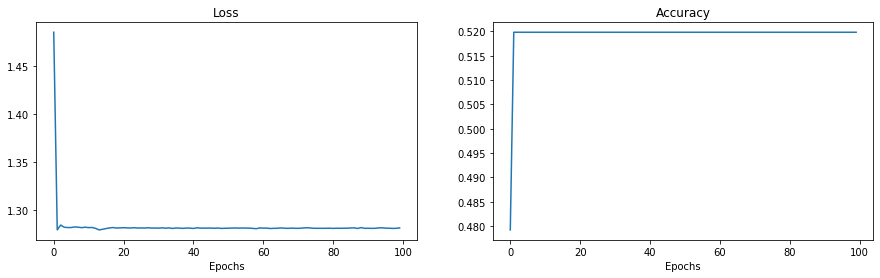

In [129]:
# PLOT MODEL ACCURACY
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2, figsize=(15,4))

ax[0].plot(modelHistory_v1.history['loss'])
ax[0].set_xlabel("Epochs")
ax[0].set_title("Loss")

ax[1].plot(modelHistory_v1.history['accuracy'])
ax[1].set_xlabel("Epochs")
ax[1].set_title("Accuracy")

In [130]:
# Deep neural network with X inputs, 2 hidden layers, 10 nodes in each hidden layer, and 7 outputs
from keras.models import Sequential
from keras.layers import Dense

fire_model_v2 = Sequential()
fire_model_v2.add(Dense(units=20, activation='sigmoid', input_dim=74))
fire_model_v2.add(Dense(units=20, activation='sigmoid'))
fire_model_v2.add(Dense(units=7, activation='softmax'))

# view the model's architecture
fire_model_v2.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 20)                1500      
_________________________________________________________________
dense_18 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_19 (Dense)             (None, 7)                 147       
Total params: 2,067
Trainable params: 2,067
Non-trainable params: 0
_________________________________________________________________


In [131]:
## Compile and train the deep learning model
fire_model_v2.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

modelHistory_v2 = fire_model_v2.fit(
    X_train,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Epoch 1/100
363/363 - 0s - loss: 1.3144 - accuracy: 0.5160
Epoch 2/100
363/363 - 0s - loss: 1.2857 - accuracy: 0.5198
Epoch 3/100
363/363 - 0s - loss: 1.2851 - accuracy: 0.5198
Epoch 4/100
363/363 - 0s - loss: 1.2850 - accuracy: 0.5198
Epoch 5/100
363/363 - 0s - loss: 1.2837 - accuracy: 0.5198
Epoch 6/100
363/363 - 0s - loss: 1.2834 - accuracy: 0.5198
Epoch 7/100
363/363 - 0s - loss: 1.2837 - accuracy: 0.5198
Epoch 8/100
363/363 - 0s - loss: 1.2828 - accuracy: 0.5198
Epoch 9/100
363/363 - 0s - loss: 1.2827 - accuracy: 0.5198
Epoch 10/100
363/363 - 0s - loss: 1.2828 - accuracy: 0.5198
Epoch 11/100
363/363 - 0s - loss: 1.2824 - accuracy: 0.5198
Epoch 12/100
363/363 - 0s - loss: 1.2822 - accuracy: 0.5198
Epoch 13/100
363/363 - 0s - loss: 1.2821 - accuracy: 0.5198
Epoch 14/100
363/363 - 0s - loss: 1.2820 - accuracy: 0.5198
Epoch 15/100
363/363 - 0s - loss: 1.2819 - accuracy: 0.5198
Epoch 16/100
363/363 - 0s - loss: 1.2818 - accuracy: 0.5198
Epoch 17/100
363/363 - 0s - loss: 1.2815 - accura

Text(0.5, 1.0, 'Accuracy')

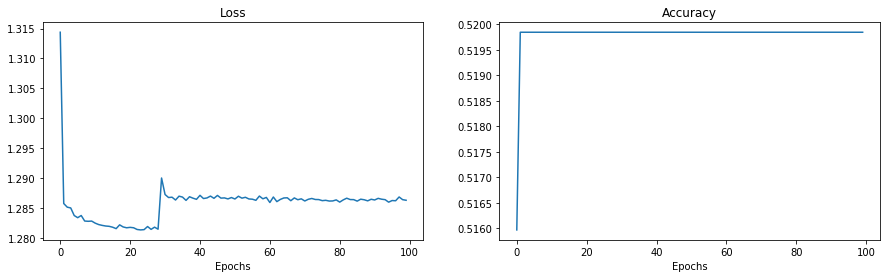

In [132]:
# PLOT MODEL ACCURACY
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2, figsize=(15,4))

ax[0].plot(modelHistory_v2.history['loss'])
ax[0].set_xlabel("Epochs")
ax[0].set_title("Loss")

ax[1].plot(modelHistory_v2.history['accuracy'])
ax[1].set_xlabel("Epochs")
ax[1].set_title("Accuracy")

In [133]:
fire_model_v1, fire_model_v1 = fire_model_v1.evaluate(X_test_scaled, y_test_categorical, verbose=2)
print(f"Normal Neural Network - Loss: {fire_model_v1_loss}, Accuracy: {model_accuracy}")

fire_model_v2, fire_model_v2 = fire_model_v2.evaluate(X_test_scaled, y_test_categorical, verbose=2)
print(f"Deep Neural Network - Loss: {fire_model_v2_loss}, Accuracy: {deep_model_accuracy}")

NameError: name 'X_test_scaled' is not defined